In [1]:
%load_ext autoreload
%autoreload 2
import sys
import csv
import pprint
import pandas as pd
from helpers import functions

csv.field_size_limit(sys.maxsize)

131072

### Load the data:

In [2]:
bbc_no_dupes_dir = 'data/processed/2019_03_27_BBC_NoDupesWithin.csv'
bbc_no_dupesatall_dir = 'data/processed/2019_03_27_BBC_NoDupesAtAll.csv'
fox_no_dupes_dir = 'data/processed/2019_03_27_FOX_NoDupesWithin.csv'
fox_no_dupesatall_dir = 'data/processed/2019_03_27_FOX_NoDupesAtAll.csv'
cnn_no_dupes_dir = 'data/processed/2019_03_28_CNN_NoDupesWithin.csv'
cnn_no_dupesatall_dir = 'data/processed/2019_03_28_CNN_NoDupesAtAll.csv'
rt_no_dupes_dir = 'data/processed/2019_03_26_RT_NoDupesWithin.csv'
rt_no_dupesatall_dir = 'data/processed/2019_03_26_RT_NoDupesAtAll.csv'

In [3]:
cols_to_keep = ['source',
                'paper_section_name',
                'source_url', 
                'url',
                'canonical_link',
                'rss_link',
                'title',
                'rss_title',
                'text',
                'paper_section_name',
                'pull_date']

BBC:

In [4]:
%%time
df_bbc_clean_nodupes_csv = pd.read_csv(bbc_no_dupes_dir)

CPU times: user 9.44 s, sys: 1.93 s, total: 11.4 s
Wall time: 11.6 s


In [5]:
%%time
df_bbc_clean_nodupes_atall_csv = pd.read_csv(bbc_no_dupesatall_dir)

CPU times: user 7.35 s, sys: 1.61 s, total: 8.97 s
Wall time: 9.06 s


Fox News:

In [6]:
%%time
df_fox_clean_nodupes_csv = pd.read_csv(fox_no_dupes_dir)

CPU times: user 3.14 s, sys: 499 ms, total: 3.64 s
Wall time: 3.65 s


In [7]:
%%time
df_fox_clean_nodupes_atall_csv = pd.read_csv(fox_no_dupesatall_dir)

CPU times: user 3.18 s, sys: 561 ms, total: 3.74 s
Wall time: 3.75 s


RT:

In [8]:
%%time
df_rt_clean_nodupes_csv = pd.read_csv(rt_no_dupes_dir)

CPU times: user 4.64 s, sys: 1.54 s, total: 6.18 s
Wall time: 6.35 s


In [9]:
%%time
df_rt_clean_nodupes_atall_csv = pd.read_csv(rt_no_dupesatall_dir)

CPU times: user 3.14 s, sys: 572 ms, total: 3.72 s
Wall time: 3.73 s


Loading CNN csv takes too long and they are too bulky. Let's use the 'csv' module instead:

In [10]:
# %%time
# df_cnn_clean_nodupes_csv = pd.read_csv(cnn_no_dupes_dir, names=['text'])

In [11]:
# %%time
# df_cnn_clean_nodupes_atall_csv = pd.read_csv(cnn_no_dupesatall_dir, names=cols_to_keep)

In [12]:
%%time
cnn_clean_nodupes_texts = []
with open(cnn_no_dupes_dir) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:  # Skip header
            cnn_clean_nodupes_texts.append(row[4])
        line_count += 1

CPU times: user 2min 44s, sys: 14.3 s, total: 2min 59s
Wall time: 3min 1s


In [13]:
len(cnn_clean_nodupes_texts)

6050

In [14]:
%%time
cnn_clean_nodupes_atall_texts = []
with open(cnn_no_dupesatall_dir) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:  # Skip header
            cnn_clean_nodupes_atall_texts.append(row[4])
        line_count += 1

CPU times: user 1min 44s, sys: 9.11 s, total: 1min 54s
Wall time: 1min 55s


In [15]:
len(cnn_clean_nodupes_atall_texts)

3942

In [16]:
%%time
# Smash all data together:
frames = [df_bbc_clean_nodupes_atall_csv, df_fox_clean_nodupes_atall_csv, df_rt_clean_nodupes_atall_csv]
df_master = pd.concat(frames, ignore_index=True)

CPU times: user 62.2 ms, sys: 188 ms, total: 250 ms
Wall time: 279 ms


In [17]:
df_master

,source_url,url,title,movies,text,keywords,meta_keywords,tags,authors,publish_date,...,rss_link,rss_id,rss_published,rss_published_parsed,rss_feedburner_origlink,paper_section_name,source,source_detail,pull_type,pull_date
0,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47063405,How has business been affected by Brexit so far?,[],With two months to go until the UK is due to l...,[],[''],set([]),"[u'Economics Correspondent', u'Dharshini David']",NaN,...,https://www.bbc.co.uk/news/business-47063405,https://www.bbc.co.uk/news/business-47063405,"Thu, 31 Jan 2019 00:03:21 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
1,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47066873,China's factory activity shrinks as slowdown w...,[],Chinese factory activity contracted for a seco...,[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47066873,https://www.bbc.co.uk/news/business-47066873,"Thu, 31 Jan 2019 02:53:39 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
2,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47057870,MPs say fast fashion brands inaction on ethics...,[],"Fashion retailers JD Sports, Sports Direct and...",[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47057870,https://www.bbc.co.uk/news/business-47057870,"Thu, 31 Jan 2019 00:12:15 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
3,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47055188,Brexit: Car investment halves as industry hits...,[],Investment in the UK car sector almost halved ...,[],[''],set([]),"[u'Business Reporter', u'Russell Hotten', u'Bb...",NaN,...,https://www.bbc.co.uk/news/business-47055188,https://www.bbc.co.uk/news/business-47055188,"Thu, 31 Jan 2019 00:04:41 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
4,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47065972,Facebook users continue to grow despite privac...,[],Facebook users have continued to rise despite ...,[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47065972,https://www.bbc.co.uk/news/business-47065972,"Wed, 30 Jan 2019 22:25:12 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
5,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47062145,Fed puts future rate rises on hold as pledges ...,[],The Federal Reserve has indicated it won't rai...,[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47062145,https://www.bbc.co.uk/news/business-47062145,"Wed, 30 Jan 2019 21:17:01 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
6,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47063403,Bosses' group head in abrupt departure,[],The boss of one of the UK's largest business l...,[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47063403,https://www.bbc.co.uk/news/business-47063403,"Wed, 30 Jan 2019 18:19:35 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
7,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47062142,Foxconn reconsiders Wisconsin factory plans,[],"Foxconn, which raised hopes of a US manufactur...",[],[''],set([]),[],NaN,...,https://www.bbc.co.uk/news/business-47062142,https://www.bbc.co.uk/news/business-47062142,"Wed, 30 Jan 2019 19:41:24 GMT","time.struct_time(tm_year=2019, tm_mon=1, tm_md...",NotFound,bbc_news_business,bbc,bbc_news_business,custom,2019-01-31
8,https://www.bbc.com/news,https://www.bbc.co.uk/news/business-47062146,Tesla reports profit as issues stabilise,[],Tesla made a profit of $139.5m (£10

### Topic Modelling
(based on https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/):

In [18]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [19]:
%%time
# Basic text cleaning:
df_master['clean_text'] = df_master['text'].apply(functions.clean_text_string,
                                                  keep_dbl_newline=False)
cnn_nodupes_atall_texts_cleaned = []
for text in cnn_clean_nodupes_atall_texts:
    cnn_nodupes_atall_texts_cleaned.append(functions.clean_text_string(text, keep_dbl_newline=False))

CPU times: user 10.1 s, sys: 137 ms, total: 10.2 s
Wall time: 10.2 s


In [20]:
# Enable stop words, for later clearing:
stop_words = stopwords.words('english')
# "bbc radio live" appears often, so add that to stop words; 'may' also seem turn up a lot, but not mean much:
stop_words.extend(['also', 'bbc', 'radio', 'live', 'may'])

In [21]:
# Convert our text strings to list:
data = df_master.clean_text.values.tolist()
data.extend(cnn_nodupes_atall_texts_cleaned)

In [22]:
# Extra text cleaning, just in case:

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [23]:
data_words = list(functions.sent_to_words(data))

#### Remove Stopwords, Make Bigrams/Trigrams and Lemmatize:

In [24]:
# Define functions for stopwords, bigrams, trigrams
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [26]:
%%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=70) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=70)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 51.9 s, sys: 442 ms, total: 52.3 s
Wall time: 52.4 s


In [27]:
%%time
# Form Bigrams:
data_words_bigrams = make_bigrams(data_words_nostops)

CPU times: user 17.3 s, sys: 329 ms, total: 17.7 s
Wall time: 17.7 s


In [28]:
%%time
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

CPU times: user 25min 9s, sys: 1min 53s, total: 27min 3s
Wall time: 7min 7s


#### Create the Dictionary and Corpus needed for Topic Modeling:

In [29]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 8.37 s, sys: 178 ms, total: 8.55 s
Wall time: 8.57 s


In [30]:
import time

#### Building LDA Model:

In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        start = time.time()
        print('Topic modelling for num_topics=', num_topics)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        #model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        end = time.time()
        print('Finished num_topics', num_topics, 'with time', end - start)
        
    return model_list, coherence_values

In [32]:
%%time

# Can take a long time to run.
model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

Topic modelling for num_topics= 2


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 2 with time 306.1885087490082
Topic modelling for num_topics= 3
Finished num_topics 3 with time 310.4450078010559
Topic modelling for num_topics= 4
Finished num_topics 4 with time 334.1452827453613
Topic modelling for num_topics= 5
Finished num_topics 5 with time 369.00795006752014
Topic modelling for num_topics= 6
Finished num_topics 6 with time 367.96039485931396
Topic modelling for num_topics= 7
Finished num_topics 7 with time 403.13715291023254
Topic modelling for num_topics= 8
Finished num_topics 8 with time 440.6737549304962
Topic modelling for num_topics= 9
Finished num_topics 9 with time 476.2478747367859
CPU times: user 2h 43min 57s, sys: 7min 54s, total: 2h 51min 51s
Wall time: 50min 7s


In [33]:
%%time
model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=10, limit=15, step=1)

Topic modelling for num_topics= 10


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 10 with time 513.1146211624146
Topic modelling for num_topics= 11
Finished num_topics 11 with time 587.534184217453
Topic modelling for num_topics= 12
Finished num_topics 12 with time 571.5289018154144
Topic modelling for num_topics= 13
Finished num_topics 13 with time 599.4308750629425
Topic modelling for num_topics= 14
Finished num_topics 14 with time 628.6747941970825
CPU times: user 2h 35min 3s, sys: 8min 45s, total: 2h 43min 49s
Wall time: 48min 20s


In [34]:
%%time
model_list4, coherence_values4 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=15, limit=21, step=1)

Topic modelling for num_topics= 15


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 15 with time 691.0951118469238
Topic modelling for num_topics= 16
Finished num_topics 16 with time 705.7277450561523
Topic modelling for num_topics= 17
Finished num_topics 17 with time 764.0610220432281
Topic modelling for num_topics= 18
Finished num_topics 18 with time 802.133266210556
Topic modelling for num_topics= 19
Finished num_topics 19 with time 842.1322269439697
Topic modelling for num_topics= 20
Finished num_topics 20 with time 836.864264011383
CPU times: user 4h 1min 16s, sys: 13min 38s, total: 4h 14min 54s
Wall time: 1h 17min 22s


In [57]:
%%time
model_list5, coherence_values5 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=21, limit=25, step=1)

Topic modelling for num_topics= 21


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 21 with time 836.3872618675232
Topic modelling for num_topics= 22
Finished num_topics 22 with time 882.4118032455444
Topic modelling for num_topics= 23
Finished num_topics 23 with time 941.8384079933167
Topic modelling for num_topics= 24
Finished num_topics 24 with time 1067.5023818016052
CPU times: user 2h 51min 41s, sys: 10min 31s, total: 3h 2min 12s
Wall time: 1h 2min 8s


In [58]:
%%time
model_list6, coherence_values6 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=25, limit=30, step=1)

Topic modelling for num_topics= 25


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 25 with time 1114.7858200073242
Topic modelling for num_topics= 26
Finished num_topics 26 with time 982.3471877574921
Topic modelling for num_topics= 27
Finished num_topics 27 with time 983.6640148162842
Topic modelling for num_topics= 28
Finished num_topics 28 with time 1026.3176009654999
Topic modelling for num_topics= 29
Finished num_topics 29 with time 1049.0155730247498
CPU times: user 3h 42min 50s, sys: 12min 13s, total: 3h 55min 4s
Wall time: 1h 25min 56s


In [67]:
%%time
model_list7, coherence_values7 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=30, limit=46, step=1)

Topic modelling for num_topics= 30


/Users/alexander/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Finished num_topics 30 with time 1263.7574751377106
Topic modelling for num_topics= 31
Finished num_topics 31 with time 1279.618304014206
Topic modelling for num_topics= 32
Finished num_topics 32 with time 1066.8624303340912
Topic modelling for num_topics= 33
Finished num_topics 33 with time 1150.6826491355896
Topic modelling for num_topics= 34
Finished num_topics 34 with time 1294.0996840000153
Topic modelling for num_topics= 35
Finished num_topics 35 with time 1459.2808079719543
Topic modelling for num_topics= 36
Finished num_topics 36 with time 1467.4793231487274
Topic modelling for num_topics= 37
Finished num_topics 37 with time 1598.359689950943
Topic modelling for num_topics= 38
Finished num_topics 38 with time 1523.7713379859924
Topic modelling for num_topics= 39
Finished num_topics 39 with time 1295.1958329677582
Topic modelling for num_topics= 40
Finished num_topics 40 with time 1332.480339050293
Topic modelling for num_topics= 41
Finished num_topics 41 with time 1398.60217595

In [68]:
models = model_list2 + model_list3 + model_list4 + model_list5 + model_list6 + model_list7
coherence_values = coherence_values2 + coherence_values3 + coherence_values4 + coherence_values5 + coherence_values6 + coherence_values7

In [69]:
%%time
for model in models:
    name = 'models/2019_04_16_optimal_model_topics' + str(model.num_topics) + '.model'
    model.save(name)

CPU times: user 3.65 s, sys: 3.9 s, total: 7.55 s
Wall time: 10.1 s


In [70]:
%%time
import pickle
with open("models/2019_04_16_coherences_values.txt", "wb") as fp:   #Pickling
    pickle.dump(coherence_values, fp)

CPU times: user 320 µs, sys: 1.85 ms, total: 2.17 ms
Wall time: 2.04 ms


In [71]:
len(coherence_values)

44

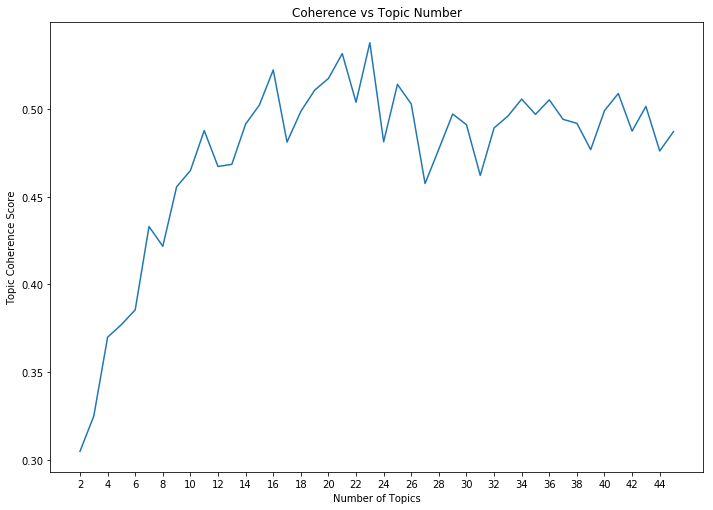

In [72]:
# Show graph
limit=len(coherence_values) + 2; start=2; step=1;
x = range(start, limit, step)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Topic Coherence Score")
plt.title("Coherence vs Topic Number")
# #plt.legend(("coherence_values"), loc='best')
plt.xticks(np.arange(min(x), max(x)+1, 2))
plt.savefig("data/CoherenceVsTopicNumber.png")
plt.show()

In [78]:
x = np.arange(2,46)

In [79]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [80]:
# Create a trace
trace = go.Scatter(
    x = x,
    y = coherence_values
)

data = [trace]

plotly.offline.iplot(data)